In [177]:
import pandas as pd; pd.set_option('max_columns', 5)  # Unclutter display.
import geopandas as gpd
import geoplot as gplt
# for some reason choropleth raises an error if any projection is used 
import geoplot.crs as gcrs 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
import numpy as np
import gc
import colorcet as cc

mpl.rcParams['font.family'] = 'monospace'
mpl.rcParams['font.monospace'] = ['Courier Prime','Courier New','Roboto Mono', 'Ubuntu Mono']

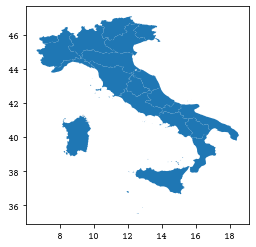

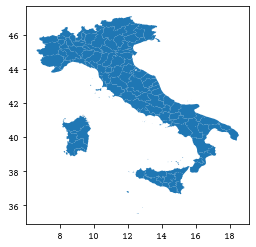

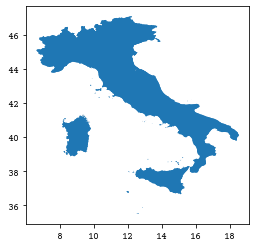

In [2]:
file_name_re = 'limits_IT_regions.geojson.txt'
file_name_prov = 'limits_IT_provinces.geojson.txt'
file_name_rzones = 'dpc-covid19-ita-aree.geojson.txt'
df_map_re = gpd.read_file(os.path.join(os.getcwd(),'Data',file_name_re))
df_map_prov = gpd.read_file(os.path.join(os.getcwd(),'Data',file_name_prov))
df_map_rzones = gpd.read_file(os.path.join(os.getcwd(),'Data',file_name_rzones))
df_map_re.plot()
df_map_prov.plot()
df_map_rzones.plot()

In [156]:
df = pd.read_csv(os.path.join(os.getcwd(),'Data','dpc-covid19-ita-province.csv'), sep=',',header=0)
df_ita = pd.read_csv(os.path.join(os.getcwd(),'Data','dpc-covid19-ita-andamento-nazionale.csv'), sep=',',header=0)
df_reg = pd.read_csv(os.path.join(os.getcwd(),'Data','dpc-covid19-ita-regioni.csv'), sep=',',header=0)
df_ita['data'] = pd.to_datetime(df_ita['data'], format="%Y-%m-%d").dt.date
date_list_repeat = df['data'].to_list()
date_list_re_repeat = df_reg['data'].to_list()
date_list = []
date_list_re = []
[date_list.append(x) for x in date_list_repeat if x not in date_list]
[date_list_re.append(x) for x in date_list_re_repeat if x not in date_list_re]
date_list = date_list[1:]
date_list_re = date_list_re[1:]
for i in range(len(date_list_re)):
    print(date_list[i],'\t', date_list_re[i] )

2020-02-25 18:00:00 	 2020-02-25 18:00:00
2020-02-26 18:00:00 	 2020-02-26 18:00:00
2020-02-27 18:00:00 	 2020-02-27 18:00:00
2020-02-28 18:00:00 	 2020-02-28 18:00:00
2020-02-29 17:00:00 	 2020-02-29 17:00:00
2020-03-01 17:00:00 	 2020-03-01 17:00:00
2020-03-02 17:00:00 	 2020-03-02 18:00:00
2020-03-03 17:00:00 	 2020-03-03 18:00:00
2020-03-04 17:00:00 	 2020-03-04 17:00:00
2020-03-05 17:00:00 	 2020-03-05 17:00:00
2020-03-06 18:00:00 	 2020-03-06 17:00:00
2020-03-07 18:00:00 	 2020-03-07 18:00:00
2020-03-08 18:00:00 	 2020-03-08 18:00:00
2020-03-09 18:00:00 	 2020-03-09 18:00:00
2020-03-10 18:00:00 	 2020-03-10 18:00:00
2020-03-11 17:00:00 	 2020-03-11 17:00:00
2020-03-12 17:00:00 	 2020-03-12 17:00:00
2020-03-13 17:00:00 	 2020-03-13 17:00:00
2020-03-14 17:00:00 	 2020-03-14 17:00:00
2020-03-15 17:00:00 	 2020-03-15 17:00:00
2020-03-16 17:00:00 	 2020-03-16 17:00:00
2020-03-17 17:00:00 	 2020-03-17 17:00:00
2020-03-18 17:00:00 	 2020-03-18 17:00:00
2020-03-19 17:00:00 	 2020-03-19 1

In [7]:
def get_daily_df(index, dataframe):
    df_data = dataframe[dataframe.data == index].copy()
    df_data.sort_values('codice_provincia', inplace=True)
    data_merged = pd.merge(df_map_prov, df_data.rename(columns={"codice_provincia": "prov_istat_code_num"}), on='prov_istat_code_num', how='left')
    data_merged.drop(['prov_istat_code','reg_istat_code_num','lat','long','prov_name','denominazione_regione','prov_acr','reg_name','reg_istat_code'], axis=1,inplace=True)
    #data_merged['Value'].fillna(0, inplace=True)
    return data_merged

df_new = get_daily_df(date_list[2], df)
print(df_new)

     prov_istat_code_num                                           geometry  \
0                      1  POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...   
1                      2  POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...   
2                      3  POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...   
3                      4  MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...   
4                      5  POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...   
..                   ...                                                ...   
102                   90  MULTIPOLYGON (((9.46502 40.65584, 9.46475 40.6...   
103                   91  MULTIPOLYGON (((9.28037 39.91741, 9.27741 39.9...   
104                   92  MULTIPOLYGON (((9.00622 39.32697, 9.01541 39.3...   
105                   95  MULTIPOLYGON (((8.78200 40.18982, 8.78829 40.1...   
106                  111  MULTIPOLYGON (((8.50222 39.71303, 8.50016 39.7...   

     ...  sigla_provincia totale_casi  
0    ...   

In [185]:
def return_ylims(ylims):
    ymax = (divmod(ylims,10**(len(str(int(ylims)))-1))[0]+1)*10**(len(str(int(ylims)))-1) #fancy way of runding to the decade
    if ymax < 10:
        return (0,10)
    else:
        return (0,int(ymax))

def y_fmt(y,pos):
    if y > 0:
        return '{:.0f}k'.format(((y/1000)))
    elif y == 0:
        return 0


def generate_pngs(date_limit, date, date_re, df, df_ita, df_rg, df_map_rzones):
    fig = plt.figure(figsize=(12,20), dpi=300)
    gs = fig.add_gridspec(3,3,**{'height_ratios': [4,1,1], 'hspace':0.3, 'wspace': 0.3  })
    df_prov = get_daily_df(date, df)

    #map plotting to ax1 ------------------------------------------------------------------
    ax1 = fig.add_subplot(gs[0,:], projection=gplt.crs.EuroPP())
    plt.text(1, 0.6, 'u/etrevis  github.com/etrevis \nfonte: protezionecivile.gov.it', color='tab:gray',fontsize=12, rotation=90, transform=ax1.transAxes)
    plt.text(0.04, 0.11, str('Date: {}/{}/{}'.format(date[8:10],date[5:7],date[:4])), fontsize=20, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
    cax = fig.add_axes([0.7,0.7,0.015,0.17])
      
    gplt.choropleth(df_prov,
                    extent = extent, 
                    ax=ax1,
                    figsize = (12,12),
                    hue='totale_casi',
                    cmap=cmap.cmap,
                    norm = norm,
                    edgecolor='black',
                    linewidth=0.6,
                   )
  
    
    if date_limit < 12:
        gplt.polyplot(df_map_rzones.loc[:10], ax=ax1, extent = extent, edgecolor='red', linewidth=1.2, zorder=2)
    elif date_limit < 14:
        gplt.polyplot(df_map_rzones.loc[20:34], ax=ax1, extent = extent, edgecolor='red', linewidth=1.6, zorder=2)
    else:
        gplt.polyplot(df_map_rzones.loc[35:36],  ax=ax1, extent = extent, edgecolor='red', linewidth=1.6, zorder=2)
    
    
    cbar = plt.gcf().colorbar(cmap, ax=ax1, cax = cax, **{'extend': 'max'})

    cbar.outline.set_linewidth(1)
    #cbar.set_label('Totale positivi', rotation=90, labelpad=-80, size=20)
    cbar.ax.tick_params(labelsize=24, labelcolor = 'black', width=1)

    #custom ax2 general ----------------------------------------------------------------------
    marker_style = dict(linestyle=':', linewidth=1.5, marker='o', markersize=6)    
    
    #total plot to ax2
    ax2 = fig.add_subplot(gs[1,0])
    date_axis = df_ita['data'].iloc[1:(date_limit+2)]   

    
    label_list = [['Total:      ', 'totale_casi'],
                  ['Active:     ', 'totale_attualmente_positivi'],
                  ['Recovered:  ', 'dimessi_guariti'],
                  ['Deceased:   ','deceduti' ]
                 ]    
    label_colors = plt.get_cmap(map_col)(np.linspace(color_limits[0], color_limits[1],(len(label_list)+1)))

    for label, color in zip(label_list, label_colors):
        plt.plot(date_axis,
                 df_ita[label[1]].iloc[1:(date_limit+2)],
                 label=(label[0]+str(int(df_ita[label[1]].iloc[date_limit+1]))),
                 color=color,
                 **marker_style)
    if date_limit > 13:
        plt.axvline(date_axis[15], color='red', linestyle='dashed', linewidth=(line_wd))
        
    ax2.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(y_fmt))
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_linewidth(line_wd)
    ax2.spines['left'].set_linewidth(line_wd)
    ax2.tick_params(labelsize=labels_sz, labelcolor = 'black', width=1)
    ax2.legend(**dict(fontsize=(labels_sz-2), markerscale=1.2, handlelength=1.2, frameon=False, loc='upper left', bbox_to_anchor=(-0.2, 1.95)))
    
    # Y-axis
    ax2.set_ylim(ymax=100000, ymin=10)
    ax2.yaxis.set_major_locator(mpl.ticker.LinearLocator(numticks=5))
    ax2.set_yscale('log')
    ax2.set_yticks((10,100,1000,10000,100000))
    
    #X- Axis
    ax2.set_xlim(left=df_ita['data'][1],
                    right=datetime(2020,
                                    int(df_ita['data'][len(df_ita['data'])-1].month),
                                    (int(df_ita['data'][len(df_ita['data'])-1].day)+1)))
    ax2.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d/%m'))
    ax2.xaxis.set_tick_params(rotation=70)
    ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3))
    
    
    
    #histrogram regions ax4 -----------------------------------------------------------------------------
    data_reg = df_rg[df_rg.data==date_re].copy()
    data_reg.drop_duplicates('totale_casi', inplace=True)
    data_reg.sort_values(by=['totale_casi'], inplace=True, ascending=False)
    data_reg_hist = data_reg.iloc[:6]          # get top six regions
    data_reg_hist.set_index('denominazione_regione', inplace=True)    
    x_ind = np.arange(len(data_reg_hist.index.to_list()))
    name_list = [(x[:4]+'.') for x in data_reg_hist.index.to_list()]
    
    label_list_reg = [['Hospitaliz.', 'totale_ospedalizzati'],
                      ['Quarantine', 'isolamento_domiciliare'],
                      ['Recovered', 'dimessi_guariti'],
                      ['Deceased','deceduti' ]]
 
    df_data_reg = []
    store_y_top = [0 for i in range(len(x_ind))]
    for label in label_list_reg:
        y_bottom = store_y_top
        y_top = []
        for region in data_reg_hist.index:
            new_y = int(data_reg_hist[data_reg_hist.index == region][label[1]])
            y_top.append(new_y)
        for i in range(len(store_y_top)):
            y_top[i] += y_bottom[i]
        store_y_top = y_top
        df_data_reg.append(pd.DataFrame({'x': [i for i in range(len(x_ind))], 'y_bottom': y_bottom, 'y_top': y_top}))
           

    label_colors_reg = plt.get_cmap(map_col)(np.linspace(color_limits[0], color_limits[1],(len(label_list_reg)+1)))

    
    ax4 = fig.add_subplot(gs[1,1])    
    
    #for some reason iterating over the zipped lists and using the bottomparameter does not work in my env
    
    ax4.bar(df_data_reg[3]['x'], df_data_reg[3]['y_top'], #bottom=df_data_reg[3]['y_bottom'],
            label=label_list_reg[3][0], width=0.95, align='center', color=label_colors_reg[3]) 
    ax4.bar(df_data_reg[2]['x'], df_data_reg[2]['y_top'], #bottom=df_data_reg[2]['y_bottom'],
            label=label_list_reg[2][0], width=0.95, align='center', color=label_colors_reg[2])
    ax4.bar(df_data_reg[1]['x'], df_data_reg[1]['y_top'], #bottom=df_data_reg[1]['y_bottom'],
            label=label_list_reg[1][0], width=0.95, align='center', color=label_colors_reg[1])
    ax4.bar(df_data_reg[0]['x'], df_data_reg[0]['y_top'],
            #bottom=df_data_reg[0]['y_bottom'],
            label=label_list_reg[0][0], width=0.95, align='center', color=label_colors_reg[0])

    ax4.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(y_fmt))
    ax4.legend(**dict(fontsize=(labels_sz-6), frameon=False, loc='upper left',handlelength=1, bbox_to_anchor=(0.25, 1.15)))    
    ax4.spines['top'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    ax4.spines['bottom'].set_linewidth(line_wd)
    ax4.spines['left'].set_linewidth(line_wd)
    ax4.tick_params(labelsize=labels_sz, labelcolor = 'black', width=1)
    plt.xticks(x_ind, name_list)
    plt.ylim(return_ylims(df_rg['totale_casi'].max()))
    ax4.yaxis.set_major_locator(mpl.ticker.LinearLocator(numticks=5))
    ax4.xaxis.set_tick_params(rotation=70)
    
    #scatter to ax5 --------------------------------------------------------------------------------
    ax5 = fig.add_subplot(gs[2,1])
    
    
    scatter = ax5.scatter((data_reg['totale_casi']/data_reg['tamponi']), data_reg['deceduti'],
                            s=data_reg['nuovi_attualmente_positivi'],
                            c=data_reg['terapia_intensiva'],
                            cmap = map_col,
                            norm = norm
                           )    
    
    ax5.set_yscale('log')
    ax5.set_ylim(1,10000)
    ax5.set_yticks((10,100,1000,10000,100000))
    ax5.set_xlim(0,0.5)
    ax5.set_xticks((0,0.1,0.2,0.3,0.4,0.5))
    ax5.xaxis.set_tick_params(rotation=70)
    plt.xlabel('Ratio Total/Tested', labelpad=10, **dict(fontsize=(labels_sz)))
    plt.ylabel('Deceased', labelpad=10, **dict(fontsize=(labels_sz)))    
    
    ax5.spines['top'].set_visible(False)
    ax5.spines['right'].set_visible(False)
    ax5.spines['bottom'].set_linewidth(line_wd)
    ax5.spines['left'].set_linewidth(line_wd)
    ax5.tick_params(labelsize=labels_sz, labelcolor = 'black', width=1)
    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.3, num = [100,250,500,750])   
    legend2 = ax5.legend(handles, labels,title="New Positive", title_fontsize = labels_sz-2, ncol = 2,
                         labelspacing=1.5, fontsize=(labels_sz-6), markerscale=1.2, handletextpad=0.2, columnspacing=0.9,
                         frameon=False, loc='upper left', bbox_to_anchor=(-1.4, 1))
    
    
    cax2 = fig.add_axes([0.1,0.11,0.2,0.01])
    cbar2 = plt.gcf().colorbar(cmap, ax=ax5, cax=cax2, **{'extend': 'max', 'orientation': 'horizontal'})
    cbar2.outline.set_linewidth(0.7)
    cbar2.set_label('Intensive care', labelpad=-60, size=(labels_sz-2))
    cbar2.ax.tick_params(labelsize=(labels_sz-4), labelcolor = 'black', width=1)
    
    plt.text(0.5, 1, 'Regional data', color='black', ha='center',fontsize=(labels_sz-2), transform=ax5.transAxes)

    
    
    #description ax 7--------------------------------------------------------------------------------

    
    #description ax 6--------------------------------------------------------------------------------
    ax6 = fig.add_subplot(gs[2,2])
    list_provinces = []
    [list_provinces.append(x) for x in df.codice_provincia.to_list() if (x not in list_provinces and int(x)<700)]

    pct_change_list = []
    for prov in list_provinces:
        df_pct = df[df.codice_provincia == prov]['totale_casi'].pct_change()
        df_pct[df_pct < 0.01] = 0
        df_pct.replace([np.inf, -np.inf], np.nan)
        df_pct.fillna(0, inplace =True)
        list_= df_pct.to_list()
        if list_[date_limit+1] == np.inf:
            pct_change_list.append(1)
        else:
            pct_change_list.append((list_[date_limit+1]+1))

    ax6.hist(pct_change_list, bins=np.linspace(1,1.5,12),
             color=label_colors_reg[3],
             edgecolor=label_colors_reg[2],
             linewidth=(line_wd/3))
    
    plt.axvline(np.mean(pct_change_list), label= 'mean:\n  {:.3f}'.format(np.mean(pct_change_list)), color=label_colors_reg[0], linestyle='dashed', linewidth=(line_wd))
    plt.axvline(np.median(pct_change_list), label= 'median:\n  {:.3f}'.format(np.median(pct_change_list)), color=label_colors_reg[1], linestyle='dashed', linewidth=(line_wd))
    ax6.legend(**dict(fontsize=(labels_sz-6), markerscale=1.2, frameon=False, loc='center', bbox_to_anchor=(0.8, 0.85)))
   
    ax6.set_xlim(xmin=1,xmax=1.5)
    ax6.set_ylim(ymax=30)
    ax6.xaxis.set_tick_params(rotation=70)
    ax6.set_xticks((1,1.1,1.2,1.3,1.4,1.5))
    plt.xlabel('Daily multiplier', labelpad=8, **dict(fontsize=(labels_sz)))
    

    ax6.spines['top'].set_visible(False)
    ax6.spines['right'].set_visible(False)
    ax6.spines['bottom'].set_linewidth(line_wd)
    ax6.spines['left'].set_linewidth(line_wd)
    ax6.tick_params(labelsize=labels_sz, labelcolor = 'black', width=1)


    #histogram to ax3 --------------------------------------------------------------------------------
    ax3 = fig.add_subplot(gs[1,2])

    
    hist_bins = []
    for x in np.logspace(0,np.log10(return_ylims(df['totale_casi'].max())[1]),12):
        hist_bins.append(x)

    ax3.hist(df_prov['totale_casi'], bins=hist_bins,
             color=label_colors_reg[3],
             edgecolor=label_colors_reg[2],
             linewidth=(line_wd/3))

    plt.axvline(df_prov['totale_casi'].mean(), label= 'mean:   {:.0f}'.format(df_prov['totale_casi'].mean()), color=label_colors_reg[0], linestyle='dashed', linewidth=(line_wd))
    plt.axvline(df_prov['totale_casi'].median(), label= 'median: {:.0f}'.format(df_prov['totale_casi'].median()), color=label_colors_reg[1], linestyle='dashed', linewidth=(line_wd))
    
    ax3.set_xscale("log")
    ax3.set_xlim(xmin=1)
    ax3.set_ylim(ymax=30)
    ax3.set_xticks((1,10,100,1000,10000))
    ax3.xaxis.set_tick_params(rotation=70)
    plt.xlabel('Number of cases', labelpad=8, **dict(fontsize=(labels_sz)))
    plt.text(0.95, 1.40, 'Histogram provinces', color='black', ha='right',fontsize=(labels_sz-6), transform=ax3.transAxes)
    ax3.legend(**dict(fontsize=(labels_sz-6), markerscale=1.2, frameon=False, loc='upper left', bbox_to_anchor=(0.17, 1.41)))

    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax3.spines['bottom'].set_linewidth(line_wd)
    ax3.spines['left'].set_linewidth(line_wd)
    ax3.tick_params(labelsize=labels_sz, labelcolor = 'black', width=1)

    
    #plt.savefig(os.path.join(os.getcwd(),'Figs',str(date_limit)+'.png'),dpi=300, bbox_inches='tight')
    #plt.close(fig)
    del date_axis,  df_data_reg, data_reg, #df_prov_, df_prov_hist,
    gc.collect()

In [5]:

map_col = cc.cm.CET_CBL2
exclusion_zones_color = 'tab:red'
extent = (6.8,36.6,18.2,47)
color_limits = (0.35 , 1.05)
limits = [0,10000]
line_wd = 2
labels_sz = 20
norm = mpl.colors.SymLogNorm(linthresh=1,vmin=limits[0], vmax=limits[1])
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=map_col)



C:\Users\etrev\Anaconda3\envs\general-maps\lib\site-packages\geoplot\geoplot.py:591: UserWarning: Cannot set "figsize" when passing an "ax" to the plot. To remove this warning omit the "figsize" parameter.
  warnings.warn(
C:\Users\etrev\Anaconda3\envs\general-maps\lib\site-packages\geoplot\geoplot.py:625: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  extent = gpd.GeoSeries(self.extent) if self.extent is not None else None


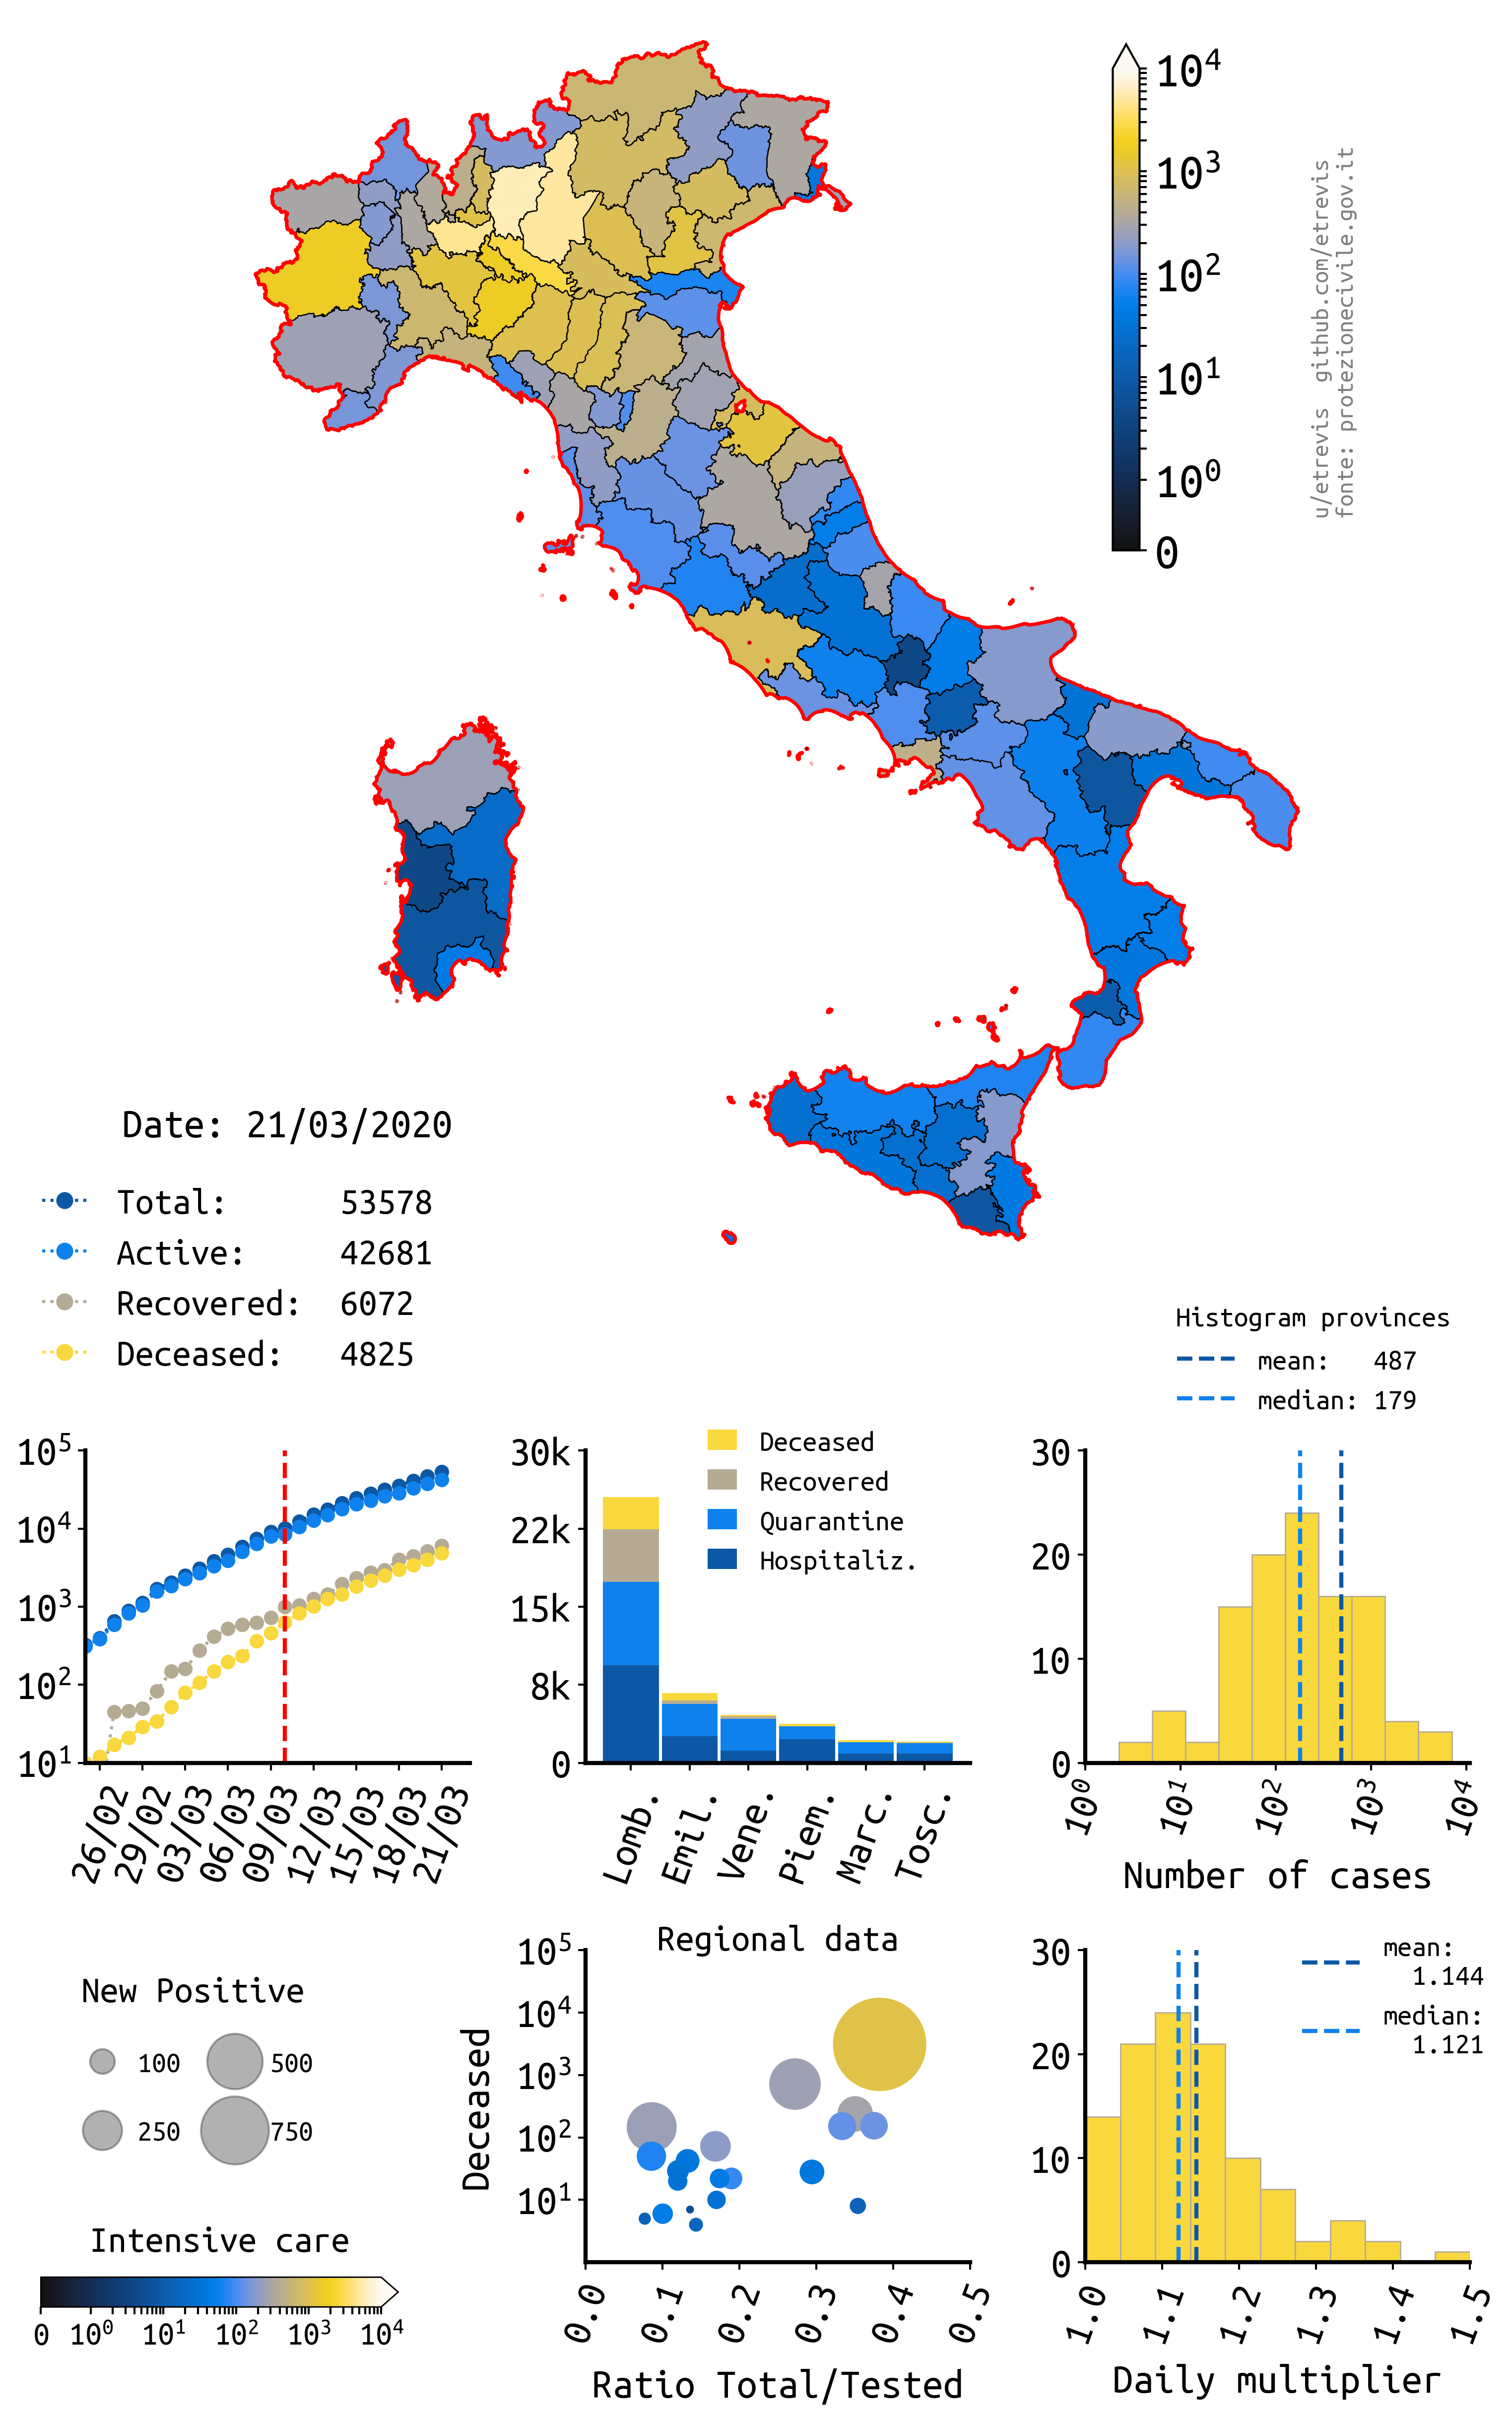

In [186]:
date_to_check = 25
generate_pngs(date_to_check, date_list[date_to_check], date_list_re[date_to_check], df, df_ita, df_reg, df_map_rzones)